# ASTR 5490 Homework 4

In [3]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from Blackbody import SED

# Reload scripts I may have changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Create a blackbody spectral energy distribution for a star like the sun with $T_{eff}=5780 K$ and $1 R_{\odot}$. Include wavelengths between the X-ray (1 angs) and far infrared (100 $\mu m$) [$10^{-10}m$ to $ 10^{-4}m$]
## <center> $B_{\lambda}=\frac{2hc^2}{\lambda^5}\frac{1}{\left(e^{\frac{hc}{\lambda kT}}-1\right)}$ </center>

## 1a) Plot this SED.  Integrate it over wavelength and multiply by the surface area of the sun ($4\pi R_{\odot}^2$) and another factor of $\pi$ (the angular integral over azimuthal and polar angle) and verify that you recover the luminosity of the sun: $4\pi R^2 \sigma T^4  = 2\cdot10^{33} \frac{erg}{s}$

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 4.22 sec to run


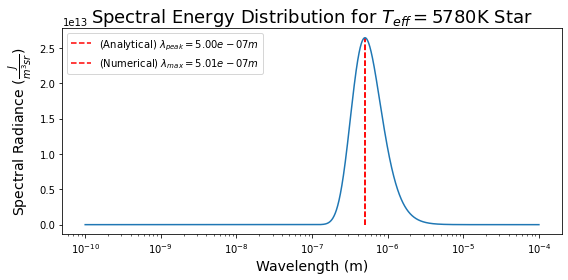

In [9]:
Sun_like = SED(5780,10**-10,10**-4,10**5)
Sun_like.SEDStar(True)